In [1]:
%matplotlib inline
import pandas as pd                                #importing essential libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn



In [2]:
url = 'https://github.com/sathvikbhupal1/MachineLearning/blob/main/MachineLearning_Datasets/diabetes.csv?raw=true'
df = pd.read_csv(url)                                       #importing the dataset from my github account and reading it through .read_csv function
df
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()                                          #using .info() function to check for the null values and data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df['Outcome'].value_counts()              #checking the total number of values in its classification with .value_counts function

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
no_zeros = ["Glucose","BloodPressure","SkinThickness","BMI"]       

for col in no_zeros:
    df[col] = df[col].replace(0, np.NaN)                              #taking off 0 values with NAN in the above mentioned columns as they cannot be 0 in real world.
    mean = int(df[col].mean(skipna = True))
    df[col] = df[col].replace(np.NaN, mean)                          #replacing the Nan with mean value of the column 


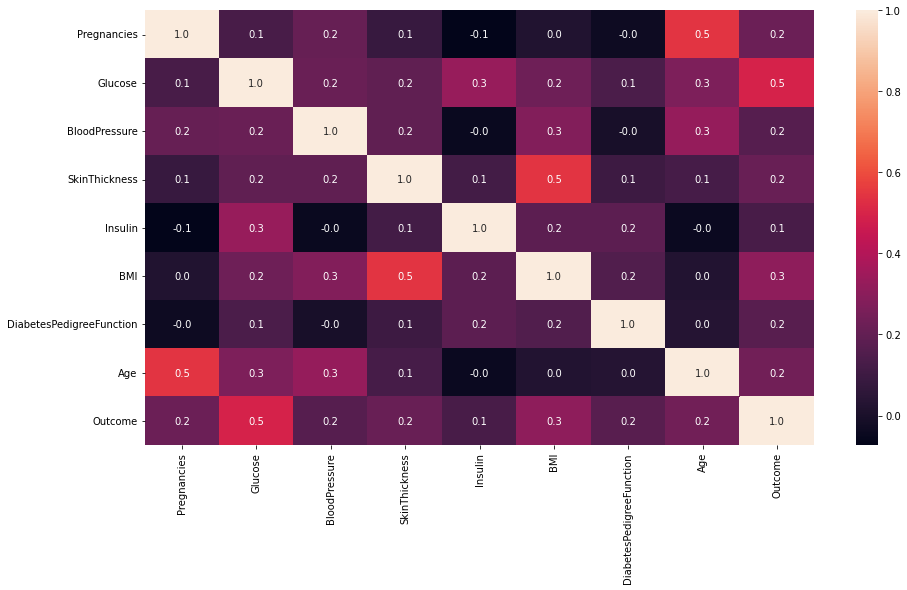

In [6]:
corr = df.corr()                                          #correlation of the data can be found through .corr() function 

plt.figure(figsize=(15,8))
sn.heatmap(corr, annot=True, fmt=".1f")                    #correlation of the data can be plotted as a heatmap with the help of seaborn library
plt.show()
plt.show()

In [7]:
X = df.drop(columns=['Outcome'])                         #splitting the data into features (X) and target (Y) to train further
Y = df['Outcome']

In [13]:
import sklearn
from sklearn.model_selection import train_test_split                 #importing essential libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,  mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA


In [10]:
pca = PCA(n_components=7)                                      #performing PCA to reduce multicolinearity or features with excess correlation
X2 = pca.fit_transform(X)          

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)             #splitting the data into train and test portions

In [15]:
model = LogisticRegression(max_iter=10000)                                #building logistic regression model 
model = model.fit(X_train,y_train)                                         #applying the logistic regression model to the training data


predictions = model.predict(X_test)                                      #predicting using test_data on the basis of model performance on training data

accuracy = sklearn.metrics.accuracy_score(predictions,y_test)            #checking the score by comparing the feature test data to target test data and compute accuracy
print("Accuracy: %.1f%%"% (accuracy*100))

print("MAE:", mean_absolute_error(y_test, predictions))                    #printing Mean_absolute_error to evaluate model performance
print('MSE:', mean_squared_error(y_test, predictions))                     #printing Mean_squared_error to evaluate model performance
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))           #printing root_Mean_absolute_error to evaluate model performance

Accuracy: 81.8%
MAE: 0.18181818181818182
MSE: 0.18181818181818182
RMSE: 0.4264014327112209
